In [10]:
import ipywidgets as widgets
from IPython.display import display
!pip install matplotlib --quiet
!pip install numpy --quiet
!pip install qiskit --quiet
!pip install qiskit_aer --quiet
#!pip install ipympl --quiet
import numpy as np
import matplotlib.pyplot as plt
import qiskit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer.primitives import Sampler
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
print("Setup done")

In [3]:
# Function to plot a measurement schematic with or without a NOT gate
def plot_measure_schematic(ax, a_val, apply_not):
    ax.clear()

    # Gate position adjustment for the measurement symbol and optional NOT gate
    x_offset = 0
    
    # Optionally apply the NOT gate
    if apply_not:
        # Draw NOT gate symbol (triangle + circle)
        triangle = plt.Polygon([[-2, -0.5], [-2, 0.5], [-1, 0]], closed=True, fill=None, edgecolor='green', linewidth=2)
        ax.add_patch(triangle)
        ax.plot([-0.9, -0.5], [0, 0], color='black', linewidth=2)  # Output line of NOT gate
        ax.plot([-2.5, -2], [0, 0], color='black', linewidth=2)  # Input line of NOT gate
        ax.plot([-0.5, x_offset - 1], [0, 0], color='black', linewidth=2)  # Connecting line to measurement
        
        # Apply NOT gate to the value
        a_val = 1 - a_val

        # Draw the small circle at the output of the NOT gate (to indicate inversion)
        not_circle = plt.Circle((-1, 0), 0.1, color='green', fill=False, linewidth=2)
        ax.add_patch(not_circle)
    else:
        # No NOT gate, direct input line
        ax.plot([-2.5, x_offset - 1], [0, 0], color='black', linewidth=2)

    # Draw the measurement symbol (rectangle with "M" label)
    measure_outline = plt.Rectangle((x_offset - 0.5, -0.5), 1, 1, fill=None, edgecolor='purple', linewidth=10)
    ax.add_patch(measure_outline)
    ax.text(x_offset, 0, 'M', fontsize=20, ha='center', va='center', color='purple')

    # Output line from measurement
    ax.plot([x_offset + 1.5, x_offset + 2], [0, 0], color='black', linewidth=2)

    # Label for input
    ax.text(-4, 0, f'Bit: 0', fontsize=12, verticalalignment='center')

    # Label for output (considering NOT gate)
    ax.text(x_offset + 3, 0, f'Measured: {a_val}', fontsize=12, verticalalignment='center')

    # Hide axis
    ax.set_xlim(-4, 4)
    ax.set_ylim(-2, 2)
    ax.axis('off')

# Function to plot quantum-like histograms for state 0 and state 1 probabilities
def plot_quantum_histogram_not(ax, a_val):
    ax.clear()

    # Probability of state |0⟩ and state |1⟩ (based on the input value)
    prob_0 = 1 if a_val == 0 else 0
    prob_1 = 1 if a_val == 1 else 0

    # Plot the probabilities
    states = ['0', '1']
    probabilities = [prob_0, prob_1]
    
    ax.bar(states, probabilities, color=['blue', 'orange'], width=0.5)

    # Set labels and title
    ax.set_ylabel('Probability')
    ax.set_title('Quantum-Like Probability Histogram')

    # Add text labels for probabilities
    for i, prob in enumerate(probabilities):
        ax.text(i, prob + 0.05, f'{prob:.2f}', ha='center', va='bottom', fontsize=12)

    # Customize axis
    ax.set_ylim(0, 1.1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Function to display the result and update both plots
def update_measure_series_side_by_side(apply_not):
    # The bit is hardcoded to 0
    a_val = 0

    # Clear the plots and generate new ones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the measurement schematic and the quantum-like histogram side by side
    plot_measure_schematic(ax1, a_val, apply_not)
    plot_quantum_histogram_not(ax2, a_val if not apply_not else 1 - a_val)
    
    # Show the updated plots
    plt.tight_layout()
    plt.show()

# Function to simulate a quantum circuit with Hadamard gates, barrier, and shots control
def simulate_hadamard_circuit(num_gates, shots):
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = qiskit.QuantumCircuit(1, 1)

    # Apply the Hadamard gate num_gates times
    for _ in range(num_gates):
        circuit.h(0)
    
    # Add a barrier
    circuit.barrier()

    # Measure the qubit
    circuit.measure(0, 0)

    # Use Qiskit's Sampler to simulate the quantum circuit
    probabs = Sampler().run(circuit, shots=shots).result().quasi_dists[0]

    prob_0 = probabs[0] if 0 in probabs else 0
    prob_1 = probabs[1] if 1 in probabs else 0

    return prob_0, prob_1, circuit

# Function to plot Hadamard gate and measurement schematic
def plot_hadamard_measure_schematic(ax, num_gates):
    ax.clear()

    # Loop through the number of Hadamard gates and draw each one
    for i in range(num_gates):
        # Gate position adjustment
        x_offset = i * 3
        
        # Draw the Hadamard gate shape (rectangle with H label)
        gate_outline = plt.Rectangle((x_offset - 0.5, -0.5), 1, 1, fill=None, edgecolor='green', linewidth=10)
        ax.add_patch(gate_outline)
        ax.text(x_offset, 0, 'H', fontsize=20, ha='center', va='center', color='green')
        
        # Input and Output lines for Hadamard gate
        if i == 0:
            ax.plot([-2, x_offset - 1], [0, 0], color='black', linewidth=2)  # First input line
        else:
            ax.plot([x_offset - 1.5, x_offset - 1], [0, 0], color='black', linewidth=2)  # Internal lines between gates
            
        ax.plot([x_offset + 1.5, x_offset + 2], [0, 0], color='black', linewidth=2)  # Output line for each gate

    # Add a visual barrier between Hadamard and measurement
    barrier_x = num_gates * 3 + 1.5
    ax.plot([barrier_x, barrier_x], [-1, 1], color='purple', linestyle='--', linewidth=3)  # Barrier line
    
    # Draw the measurement symbol after the barrier
    measure_x_offset = barrier_x + 2
    measure_outline = plt.Rectangle((measure_x_offset - 0.5, -0.5), 1, 1, fill=None, edgecolor='blue', linewidth=10)
    ax.add_patch(measure_outline)
    ax.text(measure_x_offset, 0, 'M', fontsize=20, ha='center', va='center', color='blue')
    
    # Output line after the measurement
    ax.plot([measure_x_offset + 1.5, measure_x_offset + 2], [0, 0], color='black', linewidth=2)  # Output line

    # Label for input
    ax.text(-4, 0, 'Qubit: 0', fontsize=12, verticalalignment='center')  # Fixed to 0
    
    # Hide axis
    ax.set_xlim(-3, num_gates * 3 + 8)
    ax.set_ylim(-2, 2)
    ax.axis('off')

# Function to plot quantum-like histograms for state 0 and state 1 probabilities
def plot_quantum_histogram(ax, num_gates, shots):
    ax.clear()

    # Simulate the Hadamard circuit using Qiskit
    prob_0, prob_1, circuit = simulate_hadamard_circuit(num_gates, shots)

    # Plot the probabilities
    states = ['0', '1']
    probabilities = [prob_0, prob_1]
    
    ax.bar(states, probabilities, color=['blue', 'orange'], width=0.5)

    # Set labels and title
    ax.set_ylabel('Probability')

    # Add text labels for probabilities
    for i, prob in enumerate(probabilities):
        ax.text(i, prob + 0.05, f'{prob:.2f}', ha='center', va='bottom', fontsize=12)

    # Customize axis
    ax.set_ylim(0, 1.1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Function to update histogram and gate schematic with shots control
def update_plots_had(shots_val):
    num_gates = 1  # Fixed number of gates
    
    # Clear the plot and generate new ones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the Hadamard and measurement gate schematic
    plot_hadamard_measure_schematic(ax1, num_gates)

    # Plot the quantum-like histogram
    plot_quantum_histogram(ax2, num_gates, shots_val)
    
    # Show the updated plot
    plt.tight_layout()
    plt.show()


# Function to simulate a quantum circuit with only the RY(theta) gate and shots control
def simulate_ry_circuit(shots, theta):
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = qiskit.QuantumCircuit(1, 1)

    # Apply the RY gate with angle theta
    circuit.ry(theta, 0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Use Qiskit's Sampler to simulate the quantum circuit
    probabs = Sampler().run(circuit, shots=shots).result().quasi_dists[0]

    prob_0 = probabs[0] if 0 in probabs else 0
    prob_1 = probabs[1] if 1 in probabs else 0

    return prob_0, prob_1, circuit

# Function to plot the RY gate schematic
def plot_ry_gate_schematic(ax, theta):
    ax.clear()

    # Draw the RY gate shape (rectangle with RY label)
    ry_offset = 0
    ry_gate_outline = plt.Rectangle((ry_offset - 0.5, -0.5), 1, 1, fill=None, edgecolor='purple', linewidth=10)
    ax.add_patch(ry_gate_outline)
    ax.text(ry_offset, 0, f'RY({theta:.2f})', fontsize=12, ha='center', va='center', color='purple')

    # Input and Output lines for the RY gate
    ax.plot([-2, ry_offset - 1], [0, 0], color='black', linewidth=2)  # Input line
    ax.plot([ry_offset + 1.5, ry_offset + 2], [0, 0], color='black', linewidth=2)  # Output line for the RY gate

    # Label for input
    ax.text(-4, 0, 'Qubit: 0', fontsize=12, verticalalignment='center')  # Fixed to 0
    
    # Hide axis
    ax.set_xlim(-3, 3)
    ax.set_ylim(-2, 2)
    ax.axis('off')

# Function to plot quantum-like histograms for state 0 and state 1 probabilities
def plot_quantum_histogram_ry(ax, shots, theta):
    ax.clear()

    # Simulate the RY circuit using Qiskit
    prob_0, prob_1, circuit = simulate_ry_circuit(shots, theta)

    # Plot the probabilities
    states = ['0', '1']
    probabilities = [prob_0, prob_1]
    
    ax.bar(states, probabilities, color=['blue', 'orange'], width=0.5)

    # Set labels and title
    ax.set_ylabel('Probability')

    # Add text labels for probabilities
    for i, prob in enumerate(probabilities):
        ax.text(i, prob + 0.05, f'{prob:.2f}', ha='center', va='bottom', fontsize=12)

    # Customize axis
    ax.set_ylim(0, 1.1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Function to update histogram and gate schematic
def update_plot_ry(shots, theta):
    # Clear the plot and generate new ones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the RY gate schematic
    plot_ry_gate_schematic(ax1, theta)

    # Plot the quantum-like histogram
    plot_quantum_histogram_ry(ax2, shots, theta)
    
    # Show the updated plot
    plt.tight_layout()
    plt.show()

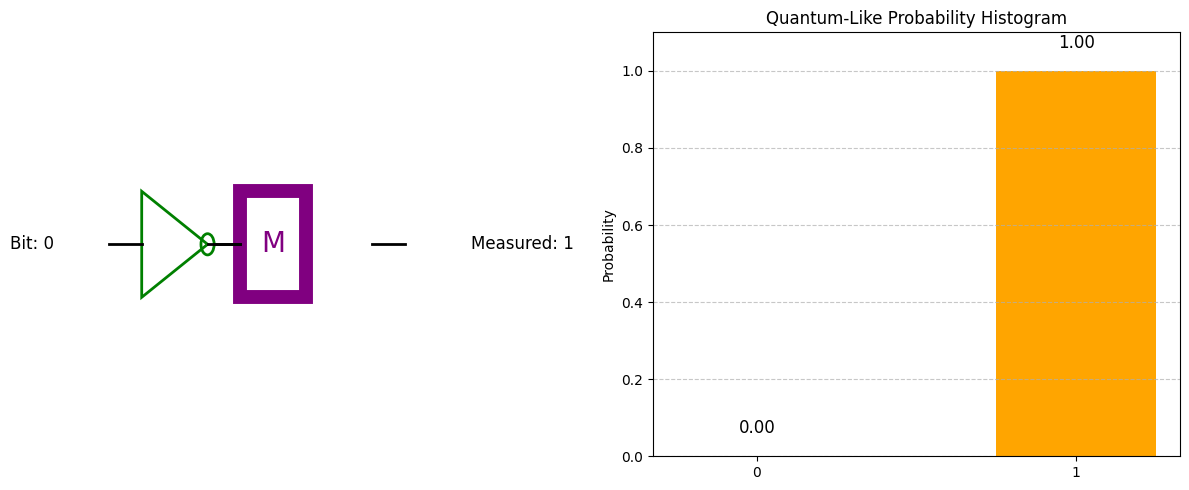

In [6]:
#Operations for NOT gate action on bits
#******************************************

# Manually set whether the NOT gate should be applied
apply_not = True  # Change this to False if you don't want the NOT gate

# Update and display the plots based on the manual setting
update_measure_series_side_by_side(apply_not)

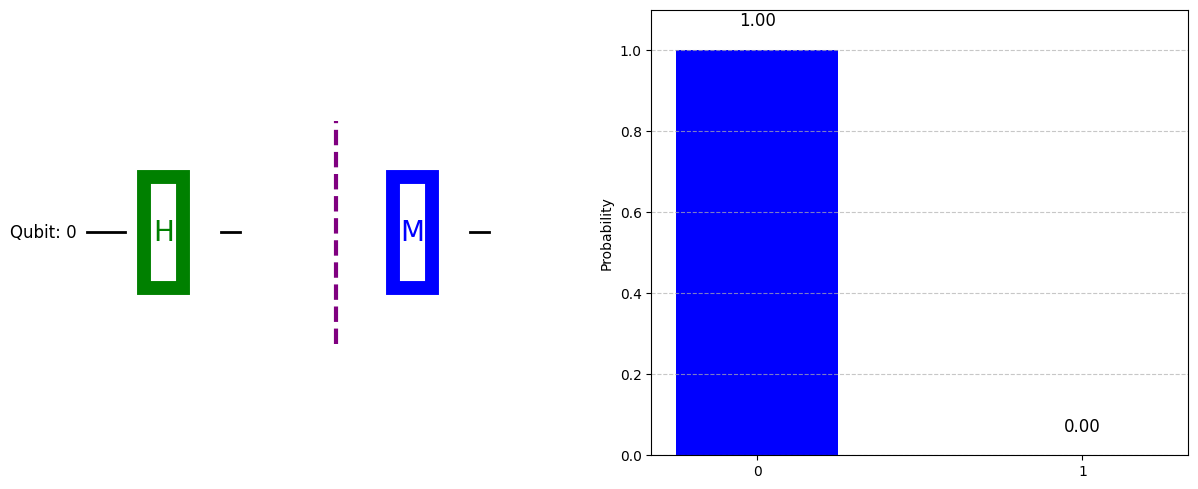

In [8]:
#Operations with Hadamard gate action followed by measurement on qubits
#***********************************************************************

# Specify the number of shots here
Number_of_times_check_Qubit = 1  # Change this number to control the number of shots

# Call the function to update the plots with the given number of shots
update_plots_had(Number_of_times_check_Qubit)

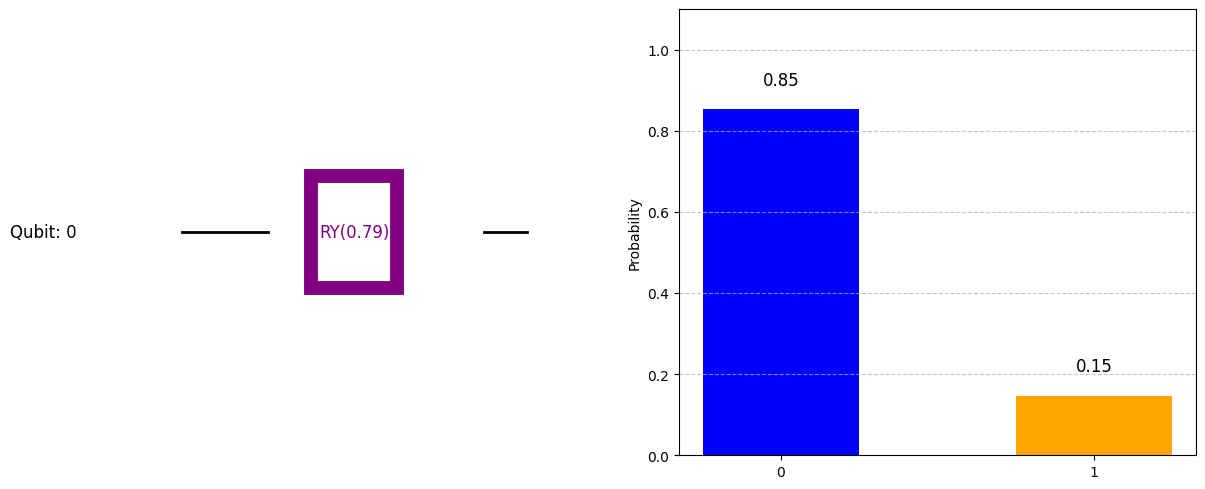

In [9]:
#Operations with Ry gate for different angles followed by measurement on qubits
#***********************************************************************
shots = 1000  # Set the number of shots (e.g., 1000)
theta = np.pi /   # Set the RY gate angle (e.g., π/4)

# Update and display the plots based on the initialized values
update_plot_ry(shots, theta)